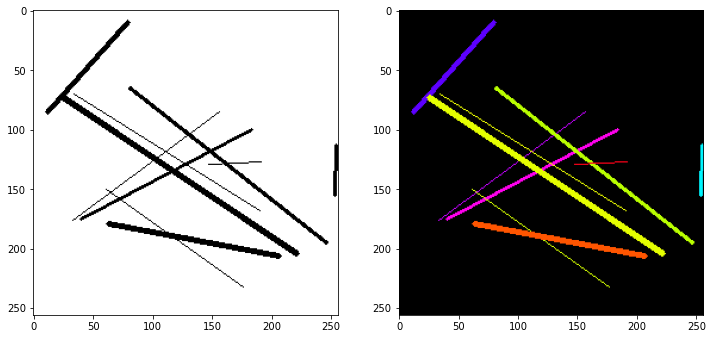

True

In [11]:
import sys
sys.path.append('../')
from helpers import helper
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

input = np.ones((256, 256, 3), dtype=np.uint8) * 255
label = np.zeros((256, 256, 3), dtype=np.uint8)

for _ in range(10):
    input, label = helper.randomlyDrawLine(input, label)

label = helper.removeWhite(input, label)
fig1, aix1 = plt.subplots(1, 2, figsize=(12, 6))
aix1[0].imshow(input)
aix1[1].imshow(cv2.cvtColor(label, cv2.COLOR_HSV2RGB))
plt.show()
cv2.imwrite('label.png', cv2.cvtColor(label, cv2.COLOR_HSV2BGR))

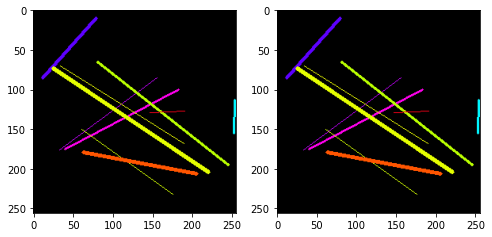

In [13]:
# label convert to label_xy then back to label again
label_XY = helper.convertHSVtoXY(label)
new_label = helper.convertXYtoHSV(label_XY)

fig1, aix1 = plt.subplots(1, 2, figsize=(8, 4))
aix1[0].imshow(cv2.cvtColor(label, cv2.COLOR_HSV2RGB))
aix1[1].imshow(cv2.cvtColor(new_label, cv2.COLOR_HSV2RGB))
plt.show()

In [8]:
df = pd.DataFrame(columns=['input_path', 'label_path'])
Input_path = '../../datasets/train/input/'
Label_path = '../../datasets/train/label/'

for i in tqdm(range(1000)):
    input_path, label_path = Input_path+str(i)+'.png', Label_path+str(i)+'.png'
    input = np.ones((256,256,3), np.uint8)*255
    label = np.zeros((256,256,3), np.uint8)
    
    for j in range(10):
        input, label = helper.randomlyDrawLine(input, label)
        
    cv2.imwrite(input_path, input)
    cv2.imwrite(label_path, cv2.cvtColor(label,cv2.COLOR_HSV2BGR))
    label_xy = helper.convertHSVtoXY(label)

    df = pd.concat([df, pd.DataFrame([[input_path, label_path]], columns=['input_path', 'label_path'])], axis=0)

df.to_csv('../../datasets/train.csv', index=False)

100%|██████████| 1000/1000 [02:04<00:00,  8.04it/s]


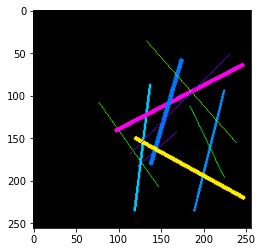

In [9]:
# read label from datasets
input = cv2.imread('../../datasets/train/input/0.png')
label = cv2.imread('../../datasets/train/label/0.png')
label = cv2.cvtColor(label, cv2.COLOR_BGR2HSV)

label_xy = helper.convertHSVtoXY(label)
label = helper.convertXYtoHSV(label_xy)
plt.imshow(cv2.cvtColor(label, cv2.COLOR_HSV2RGB))
